# Task 2
Erofeevsky Alexandr && Konina Arina

In [1]:
import random
import time
import numpy as np
import matplotlib.pyplot as plt
from copy import deepcopy

In [36]:
alpha = random.random()
print(alpha)
beta = random.random()
beta

0.35876747335765447


0.4198359178928409

In [37]:
x = [k/100 for k in range(101)]

In [38]:
y = [alpha*xk + beta + np.random.normal() for xk in x]

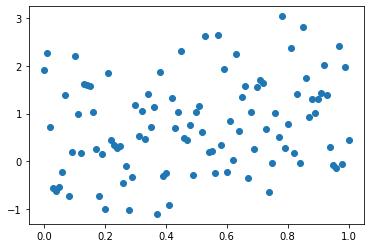

In [130]:
plt.scatter(x, y)
plt.show()

In [40]:
def f(x,a,b):
    return a*x+b

In [41]:
def D(a,b):
    return sum([(f(xk,a,b)-yk)**2 for xk, yk in zip(x, y)])

In [49]:
def f2(x,a,b):
    return a/(1+x*b)

In [50]:
def D2(a,b):
    return sum([(f2(xk,a,b)-yk)**2 for xk, yk in zip(x, y)])

### Exhaustive search

In [45]:
def exhaustive_search(function, lower, upper, precision):
    n = int((upper-lower)/precision)
    steps = [lower + k*(upper-lower)/n for k in range(n+1)]
    
    min_arg = 0
    min_func = 10000
    
    for x1 in steps:
        for x2 in steps:
            if min_func > function(x1, x2):
                min_arg1 = x1
                min_arg2 = x2
                min_func = function(x1, x2)
            
    return min_arg1, min_arg2, min_func

In [126]:
lower = 0
upper = 1
precision = 0.001

a1_exh, b1_exh, _ = exhaustive_search(D, lower, upper, precision)

In [70]:
print(a1, b1)

0.737 0.392


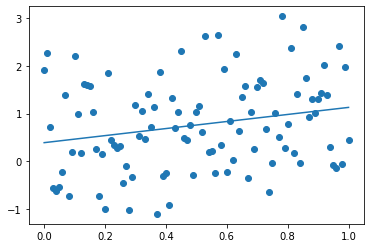

In [131]:
plt.scatter(x, y)
plt.plot(x, [f(xk, a1_exh, b1_exh) for xk in x])
plt.show()

In [128]:
lower = 0
upper = 1
precision = 0.001

a2_exh, b2_exh, _ = exhaustive_search(D2, lower, upper, precision)

In [73]:
print(a2, b2)

0.761 0.0


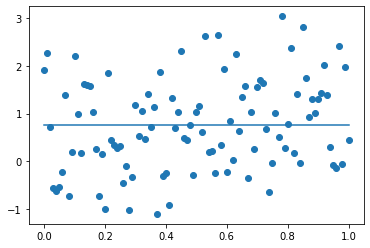

In [132]:
plt.scatter(x, y)
plt.plot(x, [f2(xk, a2_exh, b2_exh) for xk in x])
plt.show()

### Gauss

In [54]:
def golden_section(function, lower, upper, precision):
    
    iterations = 0

    while abs(lower - upper) > precision:

        x1 = lower + (3-np.sqrt(5))/2*(upper-lower)
        x2 = upper + (-3+np.sqrt(5))/2*(upper-lower)


        if function(x1) >= function(x2):
            lower = x1
        else:
            upper = x2

        iterations += 1

    extr = (lower + upper)/2

    return extr, function(extr)

In [76]:
def gauss(function, lower, upper, precision):
    
    x1 = 1
    x2 = 2
    
    curr_x1 = 10
    curr_x2 = 10
    
    while abs(curr_x1 - x1) > precision and abs(curr_x2 - x2) > precision and abs(function(curr_x1, curr_x2) - function(x1, x2)) > precision:
        curr_x1 = deepcopy(x1)
        curr_x2 = deepcopy(x2)
        def min_x1(x1):
            return function(x1, x2)
        x1, _ = golden_section(min_x1, lower, upper, precision)
        
        def min_x2(x2):
            return function(x1, x2)
        x2, _ = golden_section(min_x2, lower, upper, precision)
            
    return x1, x2, function(x1, x2)

In [121]:
lower = 0
upper = 1
precision = 0.001

a1, b1, _ = gauss(D, lower, upper, precision)

In [122]:
print(a1, b1)

0.7264710838722914 0.39740757618995837


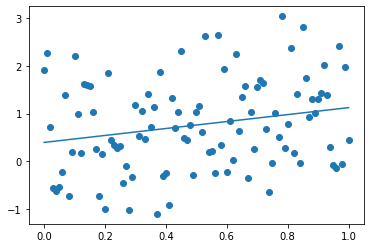

In [133]:
plt.scatter(x, y)
plt.plot(x, [f(xk, a1, b1) for xk in x])
plt.show()

In [80]:
lower = 0
upper = 1
precision = 0.001

a2, b2, _ = gauss(D2, lower, upper, precision)

In [81]:
a2, b2

(0.9996334312820714, 0.25004326756792805)

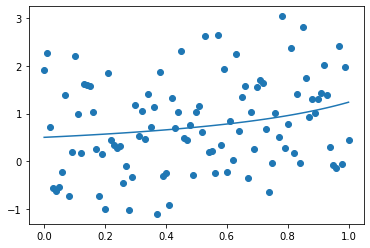

In [134]:
plt.scatter(x, y)
plt.plot(x, [f2(xk, a2, b2) for xk in x])
plt.show()

### Nelder-Mead

In [117]:
def nelder(function, lower, upper, precision):
    alpha = 1
    beta = 0.5
    gamma = 2
    
    curr_f = 0
    
    init1 = [0.5,0.7]
    init2 = [0,0.5]
    init3 = [0.5,0]
    
    fl = function(*init1)
    fg = function(*init2)
    fh = function(*init3)
    
    [[xl,fl],[xg,fg],[xh,fh]] = [[init1,fl],[init2,fg],[init3,fh]]
    
    while abs(fl-fg) > precision and abs(fl-fh) > precision and abs(fh-fg) > precision:
#         print([[xl,fl],[xg,fg],[xh,fh]])
        all_f = [[xl,fl],[xg,fg],[xh,fh]]
        all_f.sort(key = lambda x: x[1])
        [[xl,fl],[xg,fg],[xh,fh]] = all_f
        
        xc = [1/2*(xl[0]+xg[0]), 1/2*(xl[1]+xg[1])]
        
        xr = [(1+alpha)*xc[0]-alpha*xh[0], (1+alpha)*xc[1]-alpha*xh[1]]
        fr = function(*xr)
        
        if fr < fl:
            xe = [(1-gamma)*xc[0]+gamma*xr[0], (1-gamma)*xc[1]+gamma*xr[1]]
            fe = function(*xe)
            if fe < fr:
                xh = xe
                fh = function(*xh)
            elif fr < fe:
                xh = xr
                fh = function(*xh)
            else:
                print('error')
        elif fl < fr < fg:
            xh = xr
            fh = function(*xh)
        elif fg < fr < fh:
            xr, xh = xh, xr
            fr, fh = fh, fr
            xs = [beta*xh[0]+(1-beta)*xc[0], beta*xh[1]+(1-beta)*xc[1]]
            fs = function(*xs)
            if fs < fh:
                xh = xs
                fh = function(*xh)
            elif fs > fh:
                xg = [xl[0]+(xg[0]-xl[0])/2, xl[1]+(xg[1]-xl[1])/2]
                fg = function(*xg)
            else:
                print('error')
        elif fh < fr:
            xs = [beta*xh[0]+(1-beta)*xc[0], beta*xh[1]+(1-beta)*xc[1]]
            fs = function(*xs)
            if fs < fh:
                xh = xs
                fh = function(*xh)
            elif fs > fh:
                xg = [xl[0]+(xg[0]-xl[0])/2, xl[1]+(xg[1]-xl[1])/2]
                fg = function(*xg)
            else:
                print('error')
        else:
            print('error')
    return all_f[0][0]

In [119]:
lower = 0
upper = 1
precision = 0.001

[a1, b1] = nelder(D, lower, upper, precision)

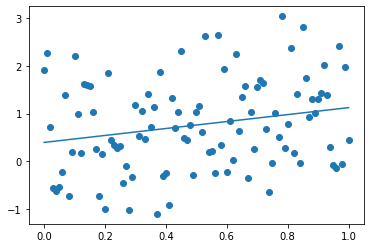

In [135]:
plt.scatter(x, y)
plt.plot(x, [f(xk, a1, b1) for xk in x])
plt.show()

In [124]:
lower = 0
upper = 1
precision = 0.001

[a2, b2] = nelder(D2, lower, upper, precision)

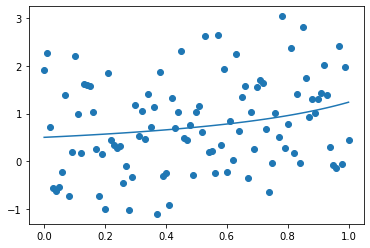

In [136]:
plt.scatter(x, y)
plt.plot(x, [f2(xk, a2, b2) for xk in x])
plt.show()